In [113]:
## Start by importing the relevant python libraries; pandas, seaborn and matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Feature abbrevations and full description

#### Age: Patients Age in years (Numeric)
#### Sex: Gender (Male : 1; Female : 0) (Nominal)
#### cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
#### trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
#### chol: Serum cholesterol in mg/dl (Numeric)
#### fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
#### restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
#### thalach: Maximum heart rate achieved (Numeric)
#### exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
#### oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
#### slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
#### ca: The number of major vessels (0–3)(nominal)
#### thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
#### target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

In [2]:
qdata = pd.read_csv(r"C:\Users\owner\Documents\DataScienceWithPython-main\DataScienceWithPython-main\files\Heart_disease_statlog.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


## Data cleaning
####  Search for missing data, zeros or duplicates

In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Result shows there is no missing data.

In [6]:
data.duplicated().sum()

0

No duplicated data as well

In [8]:
(data == 0).sum()

age           0
sex          87
cp           20
trestbps      0
chol          0
fbs         230
restecg     131
thalach       0
exang       181
oldpeak      85
slope       130
ca          160
thal          0
target      150
dtype: int64

Figures look realistic since the blood pressure,cholestrol are non-zero
Next we analyse the data types

In [10]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
data.shape

(270, 14)

data types look properly assigned with 14 columns and 270 rows
Next we use seaborn to see the data distribution

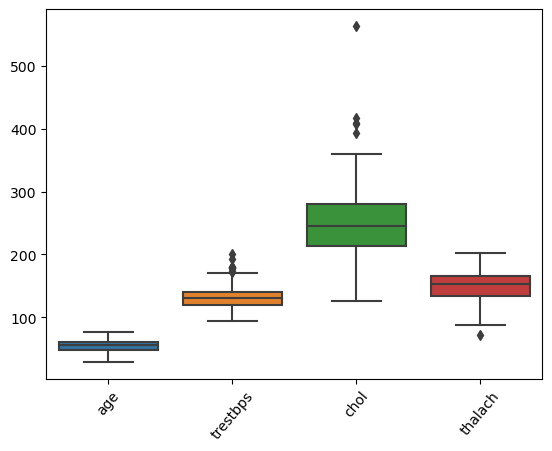

In [20]:
sns.boxplot(data=data[['age','trestbps','chol','thalach']])
plt.xticks(rotation=50)
plt.show()

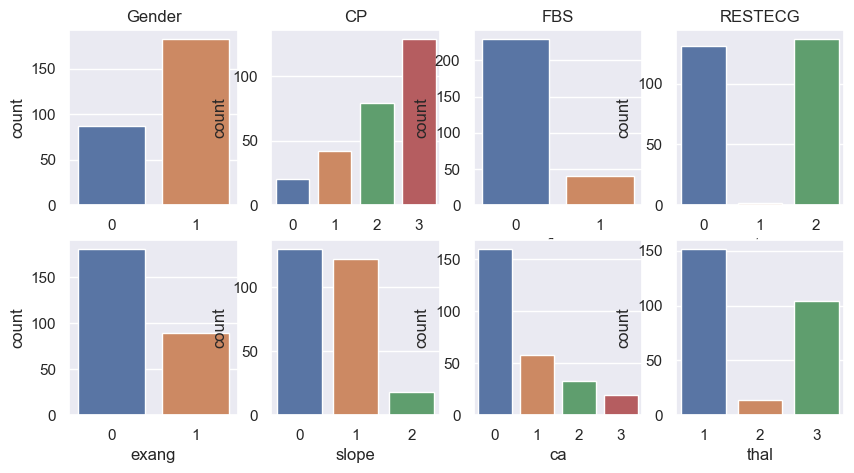

In [40]:
sns.set(rc={'figure.figsize':(10,5)})
fig, axes = plt.subplots(2,4)
sns.countplot(data=data,x='sex',ax=axes[0,0]).set(title='Gender')
sns.countplot(data=data,x='cp',ax=axes[0,1]).set(title='CP')
sns.countplot(data=data,x='fbs',ax=axes[0,2]).set(title='FBS')
sns.countplot(data=data,x='restecg',ax=axes[0,3]).set(title='RESTECG')
sns.countplot(data=data,x='exang',ax=axes[1,0])
sns.countplot(data=data,x='slope',ax=axes[1,1])
sns.countplot(data=data,x='ca',ax=axes[1,2])
sns.countplot(data=data,x='thal',ax=axes[1,3])
# or use fig.set_size_inches(row,column)
plt.show()


Lets determine the percentage of ordinal numbers in each column

In [114]:
perc_gender = (data['sex'].value_counts())/len(data)*100
print(perc_gender.round())

1    68.0
0    32.0
Name: sex, dtype: float64


In [70]:
perc_restecg = (data['ca'].value_counts())/len(data)*100
print(perc_restecg.round())

0    59.0
1    21.0
2    12.0
3     7.0
Name: ca, dtype: float64


### Summary of Countplot results
- GENDER (sex): 68% of the participants are male, 32% are female
- CHEST PAIN (cp): 7% of 270 individuals experienced Typical Angina, 16% experienced Atypical Angina, 29% had Non-Anginal Pain and rest where Asymptomatic.
- FASTING BLOOD SUGAR (fbs): 85% of individuals had a fasting blood sugar level above 120mg/dl.
- Resting Electrocardiographic Results(restecg): 49% had a Normal result, 51% had Left ventricular hypertrophy while the rest had ST-T wave normality.
- Exercise induced angina (exang): 67% admitted to having experienced exercise induced angina, 33% did not.
- Number of major vessels affected (ca):59% had thallassemia,21% had a normal blood flow,12% had no blood flow in some part of their heart while 7% had a reversible defect.


####  The next step is to find a correlation between various paramters

<AxesSubplot:>

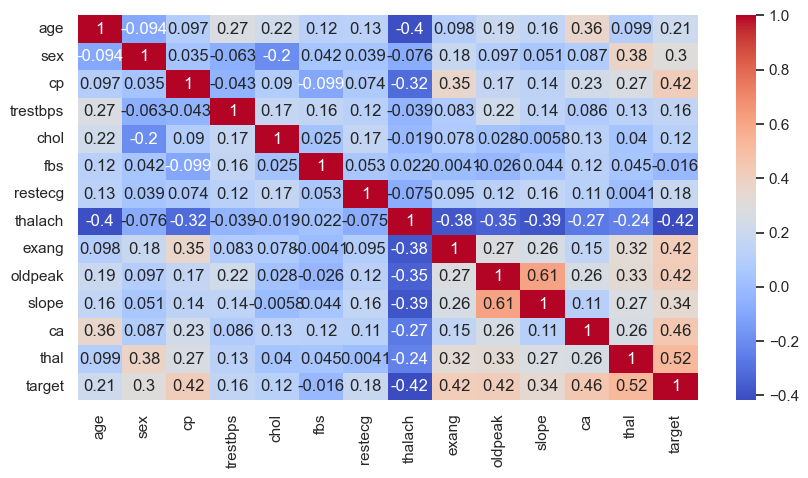

In [89]:
# create a heatmap using Seaborn
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

-- Correlation result shows no significant correlation between 13 parameters.

### Next step is to predict whether an individual is suffering from heart disease or not using SKLEARN

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [93]:
X=data.drop(columns='target')
y=data['target']

Lets train our data using the standard train_test_split function
-- then we standardize 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42 )

scale = StandardScaler().fit(X_train)

X_train_st = scale.transform(X_train)
X_test_st = scale.transform(X_test)


we can also normalize...... 
and compare the original results, standardized and normalized data to enhance accuracy

In [95]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [96]:
score = []
X_trains = [X_train,X_train_norm,X_train_st]
X_tests = [X_test,X_test_norm,X_test_st]


Using the Support Vector Machine SVM we can predict the model accuracy

In [98]:
for X_train_set, X_test_set in zip(X_trains,X_tests):
    svc = SVC()
    svc.fit(X_train_set, y_train)
    y_pred=svc.predict(X_test_set)
    score.append(accuracy_score(y_pred,y_test))

In [99]:
pd.DataFrame({'score': score}, index = ['Original', 'Normalized', 'Standardized'])

,score
Original,0.629630
Normalized,0.851852
Standardized,0.870370


Result shows a standardized data is most accurate in this case (SVM)
#### Lets try again using XGB classifier

In [105]:
score_b = []
for X_train_set, X_test_set in zip(X_trains,X_tests):
    xgc = XGBClassifier()
    xgc.fit(X_train_set, y_train)
    y_pred=xgc.predict(X_test_set)
    score_b.append(accuracy_score(y_test,y_pred))
    

In [106]:
pd.DataFrame({'score': score_b}, index = ['Original', 'Normalized', 'Standardized'])

,score
Original,0.814815
Normalized,0.814815
Standardized,0.796296


Original data seems most accurate with XGboost
#### This result is however less accurate than the standardized form of SVC used earlier
#### SO.... lets try once more with the RandomForestClassifier....

In [107]:
score_c = []
for X_train_set, X_test_set in zip(X_trains,X_tests):
    rfc = RandomForestClassifier()
    rfc.fit(X_train_set, y_train)
    y_pred=rfc.predict(X_test_set)
    score_c.append(accuracy_score(y_test,y_pred))

In [108]:
pd.DataFrame({'score': score_c}, index = ['Original', 'Normalized', 'Standardized'])

,score
Original,0.851852
Normalized,0.870370
Standardized,0.870370


- Well the results shows the standardized form of SVC and Randomforest are quite similar and most accurate with 87% accuracy
### Next lets ascertain which of the features used in the prediction are most relevant using 'permutation importance'

In [109]:
perm_importance = permutation_importance(xgc, X_train_set, y_train)
sort = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sort], X_test.columns[sort], columns=['Value'])

In [110]:
columns = X_test.columns

<AxesSubplot:>

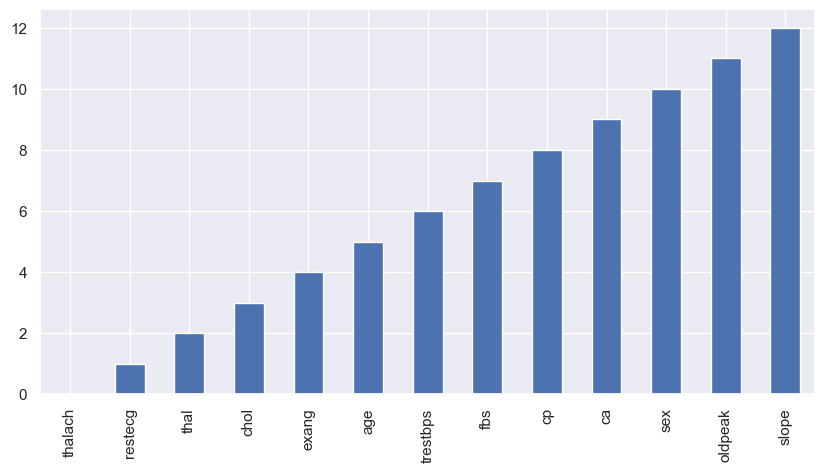

In [111]:
dt = pd.Series(sort,columns)
dt = dt.sort_values(ascending=True)
dt.plot.bar()

- In conclusion we observe that the 4 most importance features are the slope, oldpeak, Gender and Number of major affected    vessels
- Maximum heart rate,Thalassemia and Ecocardiogram result while at rest are the least influential features.